In [1]:
from src.data.load_data import load_fitness_data, load_functional_fitness_data

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from Bio.Seq import Seq
import ViennaRNA

In [2]:
ViennaRNA.fold("AUUTG")

['.....', 0.0]

In [3]:
import sys
sys.path.append('..')

In [7]:
column_mapping = {
    "SV": "sequence_dna",
    "m": "fitness",
    "m_p.value": "p_value",
    "m_se": "standard_error",
}

df = pd.read_csv("../data/raw/relative_fitness_data.csv")
df = df[["SV", "m", "m_p.value", "m_se"]]
df = df.rename(columns=column_mapping)  # type: ignore

In [39]:
df["fitness"] = df["fitness"].round(1)
df = df.dropna()
grouped = df.sample(10000).groupby("fitness")

/var/folders/f_/r0jt4c1153v7d286lm9gbgx80000gn/T/ipykernel_11184/3727650313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fitness"] = df["fitness"].round(1)


In [52]:
grouped.get_group(0.0)[["p_value", "standard_error"]].corr(method="spearman")

,p_value,standard_error
p_value,1.000000,0.423077
standard_error,0.423077,1.000000


In [62]:
grouped[["standard_error"]].corrwith(df["p_value"]).mean()

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: divide by zero encountered in divide
  c /= stddev[:, None]
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: divide by zero encountered in divide
  c /= stddev[None, :]
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


standard_error    0.503012
dtype: float64

In [61]:
grouped[["standard_error", "p_value"]].corr()

standard_error   p_value
fitness                                         
-1.1    standard_error        1.000000  0.693655
        p_value               0.693655  1.000000
-1.0    standard_error        1.000000  0.492460
        p_value               0.492460  1.000000
-0.9    standard_error        1.000000  0.236223
        p_value               0.236223  1.000000
-0.8    standard_error        1.000000  0.122784
        p_value               0.122784  1.000000
-0.7    standard_error        1.000000  0.137572
        p_value               0.137572  1.000000
-0.6    standard_error        1.000000  0.210172
        p_value               0.210172  1.000000
-0.5    standard_error        1.000000  0.394970
        p_value               0.394970  1.000000
-0.4    standard_error        1.000000  0.399926
        p_value               0.399926  1.000000
-0.3    standard_error        1.000000  0.653981
        p_value               0.653981  1.000000
-0.2    standard_error        1.000000  0.561524
        p_value               0.561524  1.000000
-0.1    standard_error        1.000000  0.732014
        p_value               0.732014  1.000000
 0.0    standard_error        1.000000  0.391112
        p_value               0.391112  1.000000
 0.1    standard_error        1.000000  0.782287
        p_value               0.782287  1.000000
 0.2    standard_error        1.000000  0.673202
        p_value               0.673202  1.000000
 0.3    standard_error        1.000000  0.462470
        p_value               0.462470  1.000000
 0.4    standard_error        1.000000  0.581519
        p_value               0.581519  1.000000
 0.5    standard_error        1.000000       NaN
        p_value                    NaN       NaN
 0.6    standard_error        1.000000  0.557259
        p_value               0.557259       NaN
 0.7    standard_error        1.000000       NaN
        p_value                    NaN       NaN
 0.8    standard_error        1.000000       NaN
        p_value                    NaN       NaN
 0.9    standard_error        1.000000       NaN
        p_value                    NaN       NaN
 1.0    standard_error        1.000000       NaN
        p_value                    NaN       NaN
 1.1    standard_error        1.000000       NaN
        p_value                    NaN       NaN
 1.2    standard_error        1.000000       NaN
        p_value                    NaN       NaN
 1.3    standard_error        1.000000       NaN
        p_value                    NaN       NaN

In [10]:
dna_sequences = fitness_df["sequence_dna"]
amino_acid_sequences = dna_sequences.apply(lambda dna: "".join(Seq(dna).translate()))

In [17]:
fitness_df.dtypes

sequence_dna       object
fitness           float64
p_value           float64
standard_error    float64
dtype: object

## General fitness distribution

In [9]:
fitness_df.describe()

,fitness,p_value,standard_error
count,261333.000000,2.613320e+05,261332.000000
mean,-0.654096,6.518118e-04,0.038276
std,0.293208,1.943004e-02,0.015938
min,-1.174803,0.000000e+00,0.004214
25%,-0.759669,3.706502e-130,0.028345
50%,-0.713981,1.523103e-85,0.035609
75%,-0.665032,1.666429e-54,0.045544
max,1.395792,9.934742e-01,0.119528


/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fitness', ylabel='Count'>

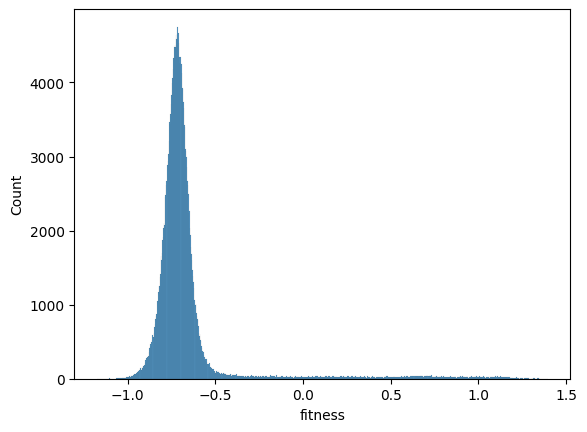

In [10]:
sns.histplot(data=fitness_df, x="fitness")

In [11]:
functional_df = load_functional_fitness_data()

In [12]:
functional_df.describe()

,fitness,p_value,standard_error
count,18039.000000,1.803800e+04,18038.000000
mean,0.258642,9.443357e-03,0.014649
std,0.531829,7.339485e-02,0.010235
min,-0.507970,0.000000e+00,0.004214
25%,-0.244416,0.000000e+00,0.008342
50%,0.232808,8.594792e-150,0.011340
75%,0.714988,1.613028e-41,0.017355
max,1.395792,9.934742e-01,0.086880


/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fitness', ylabel='Count'>

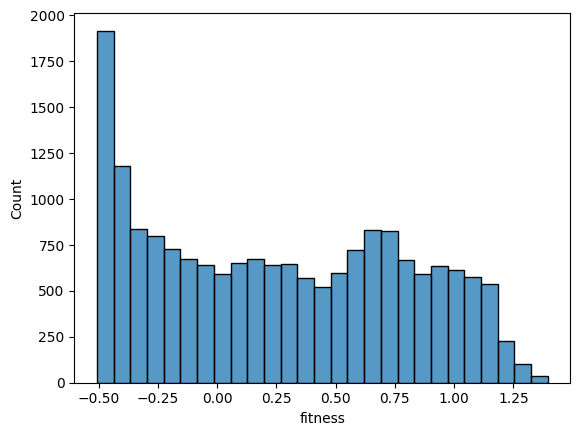

In [13]:
sns.histplot(data=functional_df, x="fitness")

In [3]:
ViennaRNA.fold("AAUUUUUUUUAUCGGGAAAUCUCAAUGAUCAGUCUGAUUGCGGCGUUAGCGGUAGAUCGCGUUAUCGGCAUGGAAAACGCCAUGCCGUGGAACCUGCCUUUUUUUUUCGCCUGGUUU")

['..........((((((..(((.....)))...))))))...((((..((.(((((.....(((..((((((((......))))))))...)))))))).))......))))......',
 -29.399999618530273]

In [6]:
ViennaRNA.fold("AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGTTAGCGGTAGATCGCGTTATCGGCATGGAAAACGCCATGCCGTGGAACCTGCCTAAAAAAAACGCCTGGTTT".replace("T", "U"))

['..........((((((..(((.....)))...))))))...((((((...(((((.....(((..((((((((......))))))))...)))))))).......))))))......',
 -31.5]

In [8]:
print("AAUUUUUUUUAUCGGGAAAUCUCAAUGAUCAGUCUGAUUGCGGCGUUAGCGGUAGAUCGCGUUAUCGGCAUGGAAAACGCCAUGCCGUGGAACCUGCCUUUUUUUUUCGCCUGGUUU")
print("AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGTTAGCGGTAGATCGCGTTATCGGCATGGAAAACGCCATGCCGTGGAACCTGCCTAAAAAAAACGCCTGGTTT".replace("T", "U"))


AAUUUUUUUUAUCGGGAAAUCUCAAUGAUCAGUCUGAUUGCGGCGUUAGCGGUAGAUCGCGUUAUCGGCAUGGAAAACGCCAUGCCGUGGAACCUGCCUUUUUUUUUCGCCUGGUUU
AAUUUUUUUUAUCGGGAAAUCUCAAUGAUCAGUCUGAUUGCGGCGUUAGCGGUAGAUCGCGUUAUCGGCAUGGAAAACGCCAUGCCGUGGAACCUGCCUAAAAAAAACGCCUGGUUU


In [123]:
df = pd.read_csv("/Users/tobiaochsner/Documents/ETH/GeneticFitness/data/processed/replication_test_2023_09_24_11_55_06/with_factors.csv")

In [124]:
len(df)

17615

In [125]:
c = []

print(len(df))

for aa in df["mutated_amino_acids"].unique():
    df_aa = df[df["mutated_amino_acids"] == aa]
    if len(df_aa) <= 2:
        continue
    c += (df_aa[["minimum_free_energy"]].corrwith(df_aa["fitness"], method="spearman").mean(),)

17615


/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  

In [118]:
import numpy as np
c = [x for x in c if not np.isnan(x)]

In [119]:
np.mean(c)

0.21429341740499222

In [120]:
len(c)

984

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

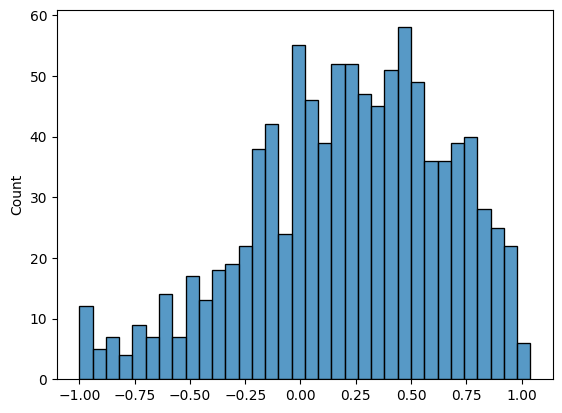

In [121]:
sns.histplot(c, binwidth=0.06)

In [108]:
len(c)

1081